In [3]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [4]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-catpicture


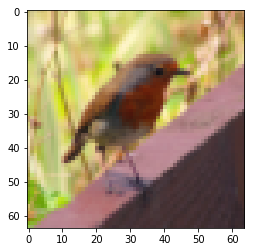

In [5]:
index = 10
plt.imshow(train_x_orig[index])
print('y = '+ str(train_y[0,index]) + ". It's a "+ classes[train_y[0,index]].decode('utf_8')+'picture')

In [10]:
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]
print(m_train)
print(m_test)
print(num_px)

209
50
64


In [11]:
print(train_x_orig.shape)

(209, 64, 64, 3)


In [12]:
print(train_y.shape)

(1, 209)


In [13]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T
print(train_x_flatten.shape)

(12288, 209)


In [15]:
train_x = train_x_flatten/255.0
test_x = test_x_flatten/255.0

In [16]:
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [24]:
def two_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    n_x, n_h, n_y = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(X,W1,b1,'relu')
        A2, cache2 = linear_activation_forward(A1,W2,b2,'sigmoid')
        
        cost = compute_cost(A2,Y)
        
        dA2 = -(np.divide(Y,A2) - np.divide(1-Y,1-A2))
        
        dA1, dW2, db2 = linear_activation_backward(dA2,cache2,'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1,cache1,'relu')
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        parameters = update_parameters(parameters,grads,learning_rate)
        
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        
        if print_cost and i%100 == 0:
            print("cost after iteration {}: {}".format(i,np.squeeze(cost)))
        if print_cost and i%100 == 0:
            costs.append(cost)
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("learning rate =" + str(learning_rate))
        plt.show()
        
        return parameters

In [30]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000,print_cost=False):
    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0,num_iterations):
        AL, caches = L_model_forward(X,parameters)
        cost = compute_cost(AL,Y)
        
        grads = L_model_backward(AL,Y,caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i%100 == 0:
            print("cost after iterations %i: %f" %(i,cost))
        if print_cost and i%100 == 0:
            costs.append(cost)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title('learning rate =' + str(learning_rate))
    plt.show()
    return parameters

cost after iteration 0: 0.6930497356599888


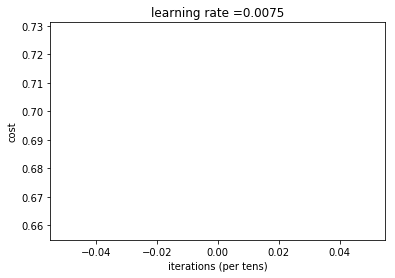

Accuracy: 0.5741626794258372


In [31]:
layers_dims = [12288,20,7,5,1]

parameters_two_layer_model = two_layer_model(train_x, train_y, layers_dims=(n_x,n_h,n_y),num_iterations=2500,print_cost=True)
predictions_train = predict(train_x,train_y,parameters_two_layer_model)

cost after iterations 0: 0.771749
cost after iterations 100: 0.672053
cost after iterations 200: 0.648263
cost after iterations 300: 0.611507
cost after iterations 400: 0.567047
cost after iterations 500: 0.540138
cost after iterations 600: 0.527930
cost after iterations 700: 0.465477
cost after iterations 800: 0.369126
cost after iterations 900: 0.391747
cost after iterations 1000: 0.315187
cost after iterations 1100: 0.272700
cost after iterations 1200: 0.237419
cost after iterations 1300: 0.199601
cost after iterations 1400: 0.189263
cost after iterations 1500: 0.161189
cost after iterations 1600: 0.148214
cost after iterations 1700: 0.137775
cost after iterations 1800: 0.129740
cost after iterations 1900: 0.121225
cost after iterations 2000: 0.113821
cost after iterations 2100: 0.107839
cost after iterations 2200: 0.102855
cost after iterations 2300: 0.100897
cost after iterations 2400: 0.092878


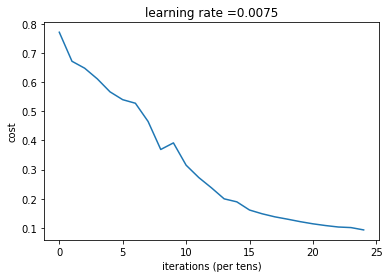

Accuracy: 0.9856459330143539
Accuracy: 0.8


In [32]:
parameters_L_layer_model = L_layer_model(train_x,train_y,layers_dims,num_iterations=2500,print_cost=True)
pred_train = predict(train_x,train_y,parameters_L_layer_model)
pred_test = predict(test_x,test_y,parameters_L_layer_model)